# Notebook for saving data to a data-table; and calculate some summary statistics for the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Where to find the files:
gps_file_name="./mb_posHZ_coords00.csv"
geno_file_name="./mb_posHZ_genotypes00.csv"
loci_names="./loci_names.csv"

# Where to save results to:
save_name_table="./data.csv"

In [3]:
# Load the Data:
position_list = np.loadtxt(gps_file_name, delimiter='$').astype('float64')
genotype_matrix = np.loadtxt(geno_file_name, delimiter='$').astype('float64')
loci_name_list = np.loadtxt(loci_names, delimiter='$',dtype=str)

print(np.shape(position_list))
print(np.shape(genotype_matrix))
print(len(loci_name_list))

(12389, 2)
(12389, 60)
60


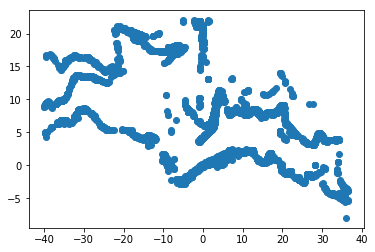

In [4]:
# Quick Sanity Check
plt.scatter(position_list[:,0],position_list[:,1])
plt.show()

In [5]:
# Calculate Fraction of Markers in Center (Remember Rescale Factor 50):

# Lower x cutoff:
x_l=-10

# Higher x cutoff:
x_h=10

#1) Extract the middle Indices:
xcoords=position_list[:,0]
good_inds=np.where((xcoords<x_h) & (xcoords>x_l))[0]

fraction = len(good_inds) / float(len(xcoords))
print("Extracted: %i" % len(good_inds))
print("Total: %i" % len(xcoords))
print("Fraction of Individuals in area: %.6f" % fraction)

Extracted: 7275
Total: 12389
Fraction of Individuals in area: 0.587214


In [6]:
# Save the final data set
#1) Rescale coordinates to original Value in meters:
scale_factor=50
position_list_rs = position_list * scale_factor


#2) Concatenate Data
data =  np.concatenate((position_list_rs, genotype_matrix), axis=1)

print("Successfully concatenated positions and genotypes")
print(np.shape(position_list_rs))

#4) Save Data
header_geo = "x-Coordinate [m],y-Coordinate [m],"
header_geno = ','.join(loci_name_list)
header=header_geo + header_geno

np.savetxt(save_name_table, data, header=header, delimiter=',', comments='')

Successfully concatenated positions and genotypes
(12389, 2)


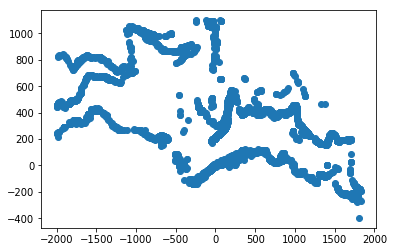

[[ 1418.589      -76.5157  ]
 [ 1536.061     -173.6629  ]
 [-1565.12       417.8192  ]
 ..., 
 [  373.7303     102.0046  ]
 [  153.6605     412.737   ]
 [    1.920297   933.2021  ]]


In [14]:
# Sanity Check to see whether it is loading correctly:
test=np.loadtxt(save_name_table,delimiter=',',dtype=str)
coordinates=test[1:,:2]
np.shape(coordinates)


plt.scatter(coordinates[:,0], coordinates[:,1])
plt.show()
print(coordinates.astype('float'))

In [15]:
data

array([[  1.41858900e+03,  -7.65157000e+01,   1.00000000e+00, ...,
          1.00000000e+00,   5.00000000e-01,   5.00000000e-01],
       [  1.53606100e+03,  -1.73662900e+02,   1.00000000e+00, ...,
          5.00000000e-01,   0.00000000e+00,   5.00000000e-01],
       [ -1.56512000e+03,   4.17819200e+02,   1.00000000e+00, ...,
          1.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       ..., 
       [  3.73730300e+02,   1.02004600e+02,   5.00000000e-01, ...,
          1.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       [  1.53660500e+02,   4.12737000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.92029700e+00,   9.33202100e+02,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00]])